In [23]:
import pandas as pd

# Load your optical database
df = pd.read_csv("Synthetic_data.csv")

df.columns

Index(['aerosol_type', 'rg1', 'rg2', 'sigma1', 'sigma2', 'gamma', 'wavelength',
       'normalized_aod', 'SSA', 'g', 'EAE', 'CRI_real', 'CRI_imag'],
      dtype='object')

In [24]:
df

,aerosol_type,rg1,rg2,sigma1,sigma2,gamma,wavelength,normalized_aod,SSA,g,EAE,CRI_real,CRI_imag
0,Dust,0.130765,1.754831,0.672417,0.553021,7.573492,440,1.000000,0.917736,0.624837,0.362123,1.461450,0.003535
1,Dust,0.130765,1.754831,0.672417,0.553021,7.573492,675,0.818786,0.923138,0.572989,0.362123,1.461450,0.003535
2,Dust,0.130765,1.754831,0.672417,0.553021,7.573492,870,0.781245,0.939347,0.597371,0.362123,1.461450,0.003535
3,Dust,0.130765,1.754831,0.672417,0.553021,7.573492,1020,0.803271,0.946724,0.630753,0.362123,1.461450,0.003535
4,Dust,0.118818,1.744768,0.680994,0.514059,7.847617,440,1.000000,0.915979,0.613492,0.250541,1.461450,0.003535
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Mixed-Fine,0.145505,2.479164,0.496605,0.677186,1.579321,1020,0.283084,0.844048,0.431371,1.514855,1.481535,0.012563
1996,Mixed-Fine,0.147872,2.246878,0.445739,0.653159,1.756103,440,1.000000,0.896596,0.593797,1.352331,1.481535,0.012563
1997,Mixed-Fine,0.147872,2.246878,0.445739,0.653159,1.756103,675,0.561328,0.876491,0.521918,1.352331,1.481535,0.012563
1998,Mixed-Fine,0.147872,2.246878,0.445739,0.653159,1.756103,870,0.397759,0.860462,0.482749,1.352331,1.481535,0.012563


In [25]:
from sklearn.model_selection import train_test_split
X = df[['normalized_aod', 'SSA', 'g']]
y = df['aerosol_type']  
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y,  # Remove for regression
    random_state=42
)

In [26]:
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print("\nClass distribution in training data:")
print(y_train.value_counts(normalize=True))


Training samples: 1600
Testing samples: 400

Class distribution in training data:
aerosol_type
Dust                0.2
Mixed-Coarse        0.2
Biomass Burning     0.2
Mixed-Fine          0.2
Urban/Industrial    0.2
Name: proportion, dtype: float64


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4, 8]
}

model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best params: {best_params}")


Best params: {'max_depth': 10, 'min_samples_split': 8, 'n_estimators': 100}


In [29]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

y_pred = grid_search.best_estimator_.predict(X_test)

print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.3f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.932
F1-Score: 0.933

Confusion Matrix:
[[74  0  1  5  0]
 [ 1 79  0  0  0]
 [ 3  0 72  5  0]
 [ 9  0  3 68  0]
 [ 0  0  0  0 80]]
                  precision    recall  f1-score   support

 Biomass Burning       0.85      0.93      0.89        80
            Dust       1.00      0.99      0.99        80
    Mixed-Coarse       0.95      0.90      0.92        80
      Mixed-Fine       0.87      0.85      0.86        80
Urban/Industrial       1.00      1.00      1.00        80

        accuracy                           0.93       400
       macro avg       0.93      0.93      0.93       400
    weighted avg       0.93      0.93      0.93       400



<Figure size 1000x800 with 0 Axes>

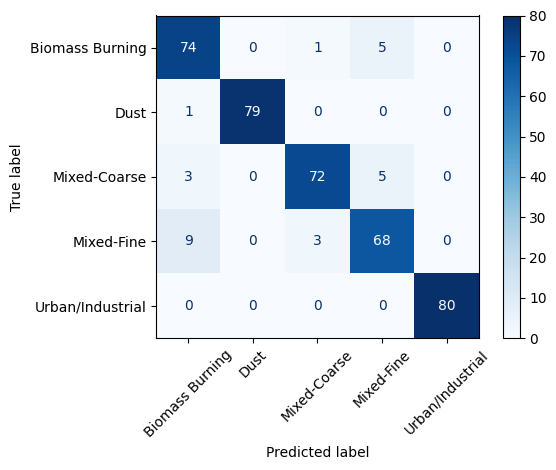

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(10, 8))
cm = ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred,
    cmap=plt.cm.Blues, 
    xticks_rotation=45
)
plt.tight_layout()
plt.show()



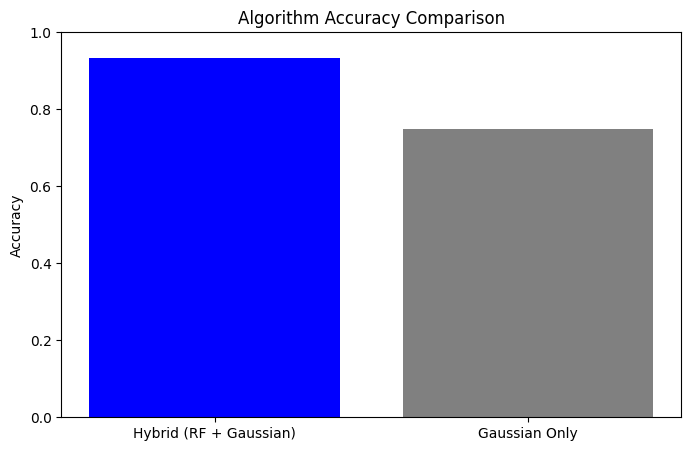

In [31]:
import matplotlib.pyplot as plt

# Example data
methods = ['Hybrid (RF + Gaussian)', 'Gaussian Only']
accuracy = [0.932, 0.75]

plt.figure(figsize=(8, 5))
plt.bar(methods, accuracy, color=['blue', 'gray'])
plt.title('Algorithm Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
